# Analyzing Popular App Categories on Google Play

In this project our goal is to figure out what types of apps tend to be popular on the google Play Store.

In [227]:
import pandas as pd 

In [61]:
import matplotlib.pyplot as plt

In [62]:
# read to datasets into pandas DataFrame objects
android_df = pd.read_csv("googleplaystore.csv")

In [63]:
# Explore the data using pandas methods
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [64]:
android_df.shape

(10841, 13)

In [65]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [66]:
android_df[android_df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [67]:
android_df[android_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [68]:
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE',"1.9", 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', "LIFESTYLE", 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [69]:
android_df[android_df["Category"] == "1.9"] = clean_lst

C:\Users\smc\AppData\Local\Temp\ipykernel_9856\1855551507.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  android_df[android_df["Category"] == "1.9"] = clean_lst


In [70]:
android_category = android_df["Category"].value_counts()
android_category

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [71]:
app_count = android_df["App"].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [72]:
app_count[app_count>1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [73]:
"Instagram" in app_count[app_count>1]

True

In [74]:
android_df[android_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [75]:
# check for duplicate rows based on the 'App' column marking all duplicates as true
duplicate_apps_df = android_df[android_df.duplicated(subset=["App"], keep = False)]

#Number of duplicate apps
duplicate_apps_df[duplicate_apps_df["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [76]:
duplicate_apps_df = android_df[android_df.duplicated(subset=["App"], keep = "first")]
duplicate_apps_df[duplicate_apps_df["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [77]:
duplicate_apps_df = android_df[android_df.duplicated(subset=["App"], keep = "last")]
duplicate_apps_df[duplicate_apps_df["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [78]:
#Number of duplicate apps
num_duplicate_apps = duplicate_apps_df["App"].nunique()
num_duplicate_apps

798

In [79]:
duplicate_apps_df.shape

(1181, 13)

In [80]:
android_df["App"].shape

(10841,)

In [81]:
10841-1181

9660

we don't want to count certain apps more than once when we analyze data, so we need to remove the
duplicate entries and keep only one entry per app. One thing we could do is remove the duplicte rows
randomly, but we could properly find a better way.

If you examine the rows we printed two cells above for the Instagram app, the main difference happens
on the fourth position of each row, whihc corresponds to the number of reviews. The different numbers
show that the data was collected at different times. We can use this to build a criterion for keeping rows.
We won't remove rows randomly, but rather well keep the rows that have the highest number of reivews
beacuse the higher the number of reviews, the more reliable the ratings.

# Part Two

Lets start by building the dictionary.

In [82]:
# group by App and get the maximum of reviews for each app
max_reviews = android_df.groupby("App")["Reviews"].max()

In [83]:
max_reviews["Instagram"]

'66577446'

In [84]:
max_reviews

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [85]:
# create an empty List to store elemend data
android_clean = []

# create an empty List to keep track pf already added apps
already_added = []

# Iterate through each row the DataFrame
for index , row in android_df.iterrows():
    name = row["App"]
    n_reviews = row["Reviews"]

 # check if the currect app has the maximum number of reiews and has not been already_added
    if (max_reviews[name] == n_reviews) and (name not in already_added):
        android_clean.append(row) # Add the app to the cleaned list
        already_added.append(name) # add the app name to the List of already added app

In [86]:
android_clean = pd.DataFrame(android_clean)

In [87]:
android_df.shape

(10841, 13)

In [88]:
android_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [89]:
def is_english(app_name):
    lst = []
    for i in app_name:
       if ord(i) > 127:
           lst.append(False)
       else:
           lst.append(True)
    
    
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1

    if non_ascii > 3:
        return False
    else:
        return True
        

In [90]:
android_english = android_clean[android_clean["App"].apply(is_english)]

In [91]:
android_english.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [92]:
android_english.shape

(9615, 13)

# Isolating the Free Apps

As we mentioned in the introduction we only build apps that are free to download and install, and our
main source of revenue consist of in-app ads. Our data sets contain both free and non-free apps and
we'll need to Isolate only the free apps for our analysis. Below, we Isolate the free for both our data sets.

In [93]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [94]:
android_final = android_english[android_english["Price"]== "0" ]

In [95]:
android_final.shape

(8863, 13)

In [96]:
# Analysis
android_final["Category"].value_counts(normalize=True)*100

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

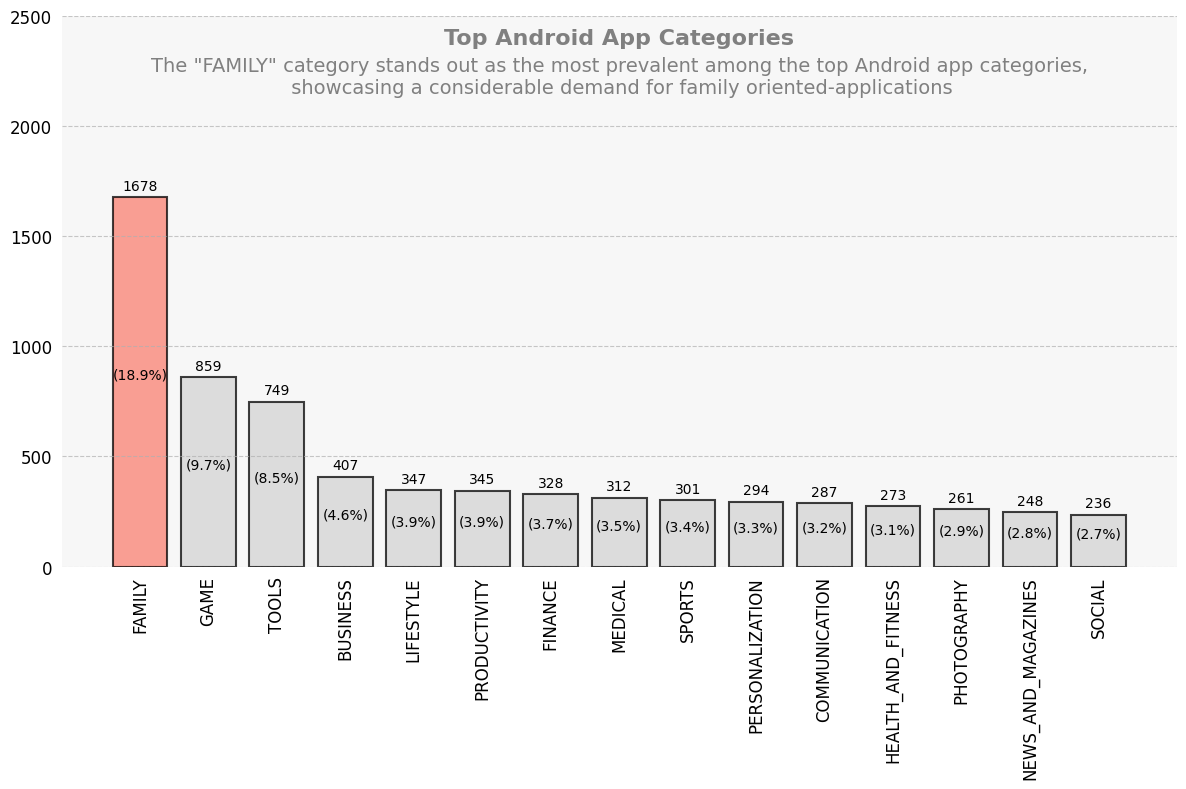

In [97]:
#Data
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize=True)*100,1)[:15]

#Create stylish bar chart
plt.figure(figsize=(12,8))
bars = plt.bar(categories, counts, color='lightgray', alpha=0.75, edgecolor='black' , linewidth=1.5)
plt.xticks(rotation=90, fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) # Customized Tick labels
plt.yticks(range(0, 3000, 500), fontsize=12) # Customized Tick labels and customized y-tick range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, '%d' % int(height), ha='center' , va='bottom' , fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'({perc}%)', ha='center', va='bottom' , fontsize=10 , color='black')
 
# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding Chart title inside the chart
plt.text(0.5, 0.95, 'Top Android App Categories', horizontalalignment='center', fontsize=16 , transform=plt.gca().transAxes,
 color='gray', fontweight='bold')

# Adding conclusion inside the chart
plt.text(0.5, 0.86, 'The "FAMILY" category stands out as the most prevalent among the top Android app categories,\n showcasing a considerable demand for family oriented-applications' , 
 horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes, color='gray')

# Remove spines
for spine in ['top', 'right', 'left', 'bottom']: # Corrected the loop syntax
     plt.gca().spines[spine].set_visible(False)

plt.tight_layout() # Adjust layout to prevent clipping

plt.show()

In [111]:
android_final[android_final["Category"] == "FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up,1000000
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up,5000000
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up,5000000
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up,1000000
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up,50
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up,5000
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,500
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000


# Most Popular Apps by Genre on Google Play

For the Google Play market, we actually have data about the number of instails, so we should be able to
get a clear picture about genre popularity. However, the istall number don't seem precise enough - we
can se that most values are open-ended(100+, 1,000+, 5,000+ etc)

In [112]:
android_final["Installs"].value_counts(normalize = True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [124]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",", "").str.replace("+","").astype(int)

C:\Users\smc\AppData\Local\Temp\ipykernel_9856\2861460289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",", "").str.replace("+","").astype(int)


In [135]:
android_final["Installs_int"]

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [136]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [137]:
install_frq_per= round(android_final["Installs_int"].value_counts(normalize = True)*100,2).sort_index()
install_frq_per = install_frq[install_frq.index > 500]
install_frq_per

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [138]:
# alphanumeric unit
def alphanumeric_units(value):
    if value >=1e9:
        return f'{value / 1e9:.0f}B'
    elif value >=1e6:
        return f'{value / 1e6:.0f}M'
    elif value >=1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [139]:
f"{2000/1e3:.0f}K"

'2K'

In [140]:
install_frq.index

Index([      1000,       5000,      10000,      50000,     100000,     500000,
          1000000,    5000000,   10000000,   50000000,  100000000,  500000000,
       1000000000],
      dtype='int32', name='Installs_int')

In [141]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

Installs_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

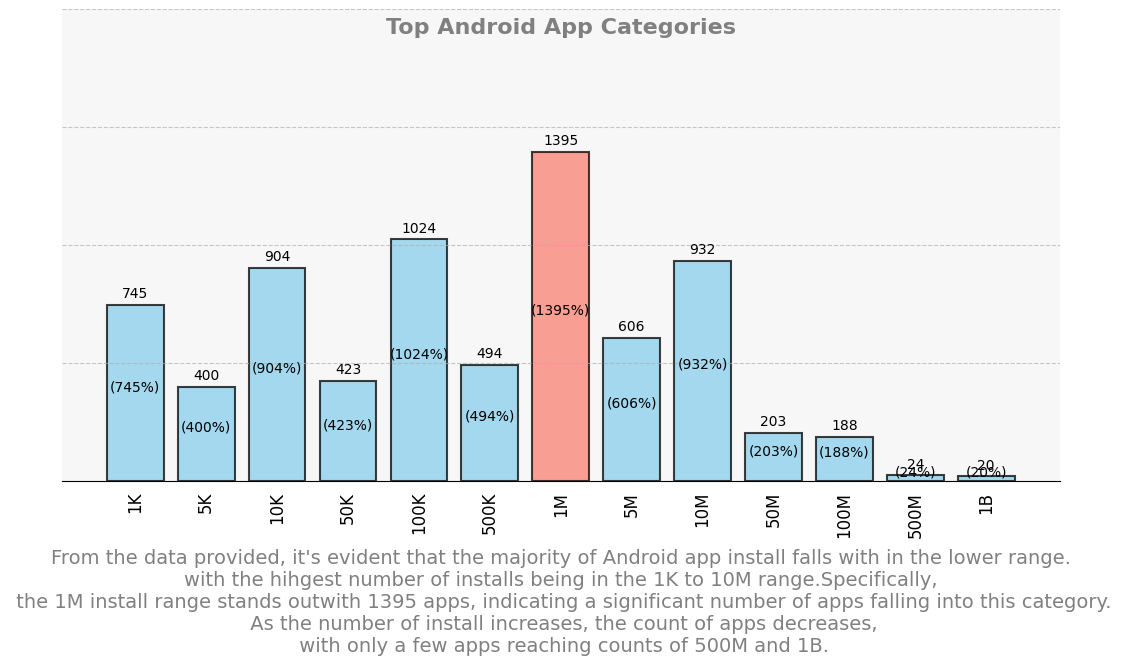

In [159]:
# Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq.values

# Create stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) # Customized Tick labels
plt.yticks(range(0, 2500, 500), [], fontsize=12) # Customized Tick labels and customized y-tick range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, '%d' % int(height), ha='center' , va='bottom' , fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'({perc}%)', ha='center', va='bottom' , fontsize=10 , color='black')

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding Chart title inside the chart
plt.text(0.5, 0.95, 'Top Android App Categories', horizontalalignment='center', fontsize=16 , transform=plt.gca().transAxes,
 color='gray', fontweight='bold')

# Adding conclusion inside the chart
plt.text(0.5, -0.36, '''From the data provided, it's evident that the majority of Android app install falls with in the lower range.\nwith the hihgest number of installs being in the 1K to 10M range.Specifically,\n the 1M install range stands outwith 1395 apps, indicating a significant number of apps falling into this category.\n As the number of install increases, the count of apps decreases,\n with only a few apps reaching counts of 500M and 1B.''',
horizontalalignment='center', fontsize=14, transform=plt.gca().transAxes, color='gray')

# Remove spines
for i in ['top', 'right', 'left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout() # Adjust layout to prevent clipping

plt.show()


In [178]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [179]:
pd.pivot_table(android_final, values="Installs_int", index="Category", aggfunc="mean")

,Installs_int
Category,
ART_AND_DESIGN,1986335
AUTO_AND_VEHICLES,647318
BEAUTY,513152
BOOKS_AND_REFERENCE,8767812
BUSINESS,1712290
COMICS,817657
COMMUNICATION,38456119
DATING,854029
EDUCATION,1820673


In [202]:
# Display DataFrame without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [203]:
categories_installs= pd.pivot_table(android_final, values="Installs_int", index="Category" , aggfunc="mean")
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs['Installs_int']
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [204]:
# alphanumeric unit
def alphanumeric_units(value):
    if value >=1e9:
        return f'{value / 1e9:.1f}B'
    elif value >=1e6:
        return f'{value / 1e6:.1f}M'
    elif value >=1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [205]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

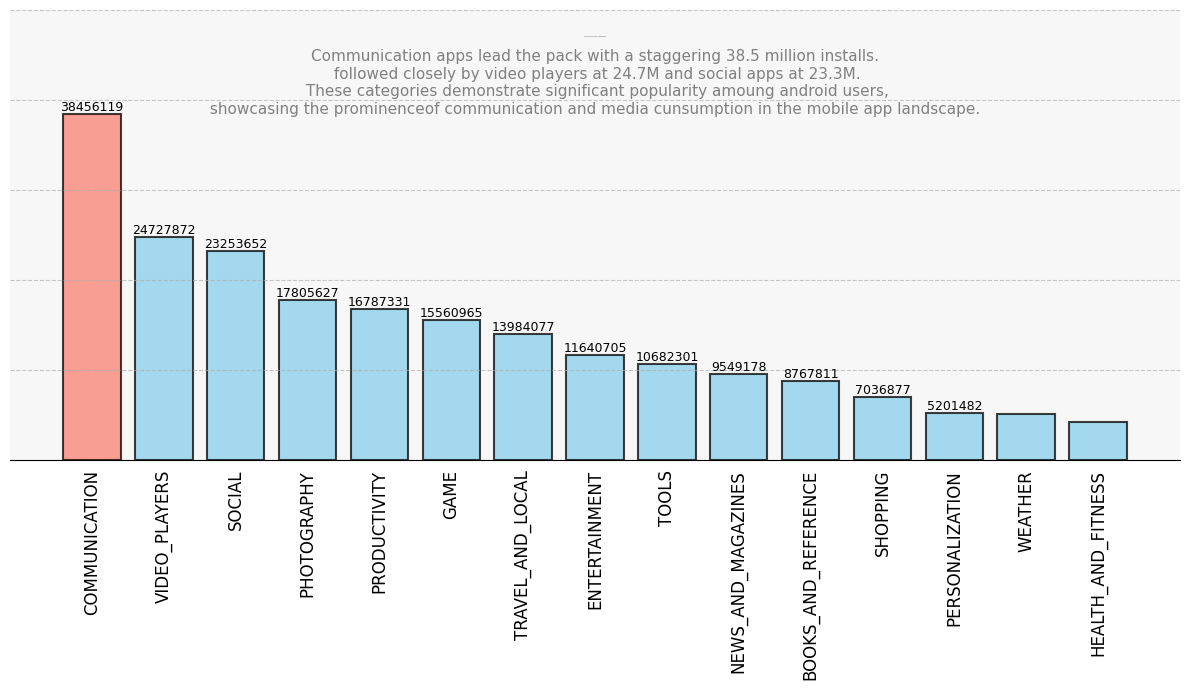

In [210]:
# Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# Create stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')
plt.xticks(fontsize=12) # Customized Tick labels
plt.yticks(range(0, 60000000, 10000000), [], fontsize=12) # Customized Tick labels and customized y-tick range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 25, f'{int(height)}', ha='center' , va='bottom' , fontsize=9)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding Chart title inside the chart
plt.text(0.5, 0.94, 'Top Android App Categories', horizontalalignment='center', fontsize=1, transform=plt.gca().transAxes,
 color='gray', fontweight='bold')

# Adding conclusion inside the chart
plt.text(0.5, 0.77, '''Communication apps lead the pack with a staggering 38.5 million installs.\n followed closely by video players at 24.7M and social apps at 23.3M.\n These categories demonstrate significant popularity amoung android users,\n showcasing the prominenceof communication and media cunsumption in the mobile app landscape. ''',
horizontalalignment='center', fontsize=11, transform=plt.gca().transAxes, color='gray')

# Remove spines
for i in ['top', 'right', 'left']:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout() # Adjust layout to prevent clipping

plt.show()

In [211]:
category_group = android_final.groupby("Category")

In [213]:
COMMUNICATION = category_group.get_group('COMMUNICATION').sort_values(by="Installs_int" , ascending = False)
COMMUNICATION.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [214]:
# alphanumeric unit
def alphanumeric_units(value):
    if value >=1e9:
        return f'{value / 1e9:.0f}B'
    elif value >=1e6:
        return f'{value / 1e6:.0f}M'
    elif value >=1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'

In [215]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [216]:
df = COMMUNICATION[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [222]:
df = category_group.get_group('VIDEO_PLAYERS').sort_values(by="Installs_int", ascending=False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_units"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_units
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [221]:
df = category_group.get_group('SOCIAL').sort_values(by="Installs_int", ascending=False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_units"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_units
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [223]:
df = category_group.get_group('PHOTOGRAPHY').sort_values(by="Installs_int", ascending=False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_units"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_units
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


# Analysis of Photography Cetegory and Potential for Photo Generation App in 2024.



## Conclusion


The analysis of the photography category reveals a notable trained in the popularity of photo editing and
college-making applications with several apps gameing over 100 million instals. This indicates a strong
demand for photo-related functionalities among users.nt in 2024.

Given this observation, there appears to be significant potential for the photo generation application in
2024. Such as app, offering prompt and free generation of pictures and photos, could capitilize on the
existing user internet in photography apps. By providing innovation features easy usability and highquality output, this application could out in the competitive market and attract a large user base.

Considering the success of existing photography apps and the evolving preferences of users, investing
in the development of a photo generation app seems promissing for lapping into this lucrative market
segment in 2024

In [225]:
df = category_group.get_group('AUTO_AND_VEHICLES').sort_values(by="Installs_int", ascending=False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_units"] = df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_units
72,"Android Auto - Maps, Media, Messaging & Voice",10000000,10M
8289,AutoScout24 - used car finder,10000000,10M
70,Fines of the State Traffic Safety Inspectorate...,5000000,5M
69,Used cars for sale - Trovit,5000000,5M
67,Ulysse Speedometer,5000000,5M
85,CarMax – Cars for Sale: Search Used Car Inventory,1000000,1M
84,Used car search Goo net whole car Go to net,1000000,1M
88,AutoScout24 Switzerland – Find your new car,1000000,1M
81,PakWheels: Buy & Sell Cars,1000000,1M
50,Real Tractor Farming,1000000,1M
